In [12]:
%qtconsole

In [3]:
import sys
sys.path.append('../..')

In [7]:
import numpy as np
from utils import sg_to_triplets, batch_triplets
from model.model import Model

import sys
sys.path.append('/localdisk/ebigelow/lib/visual_genome_python_driver')
import src.local as vg

# Arguments

In [10]:
data_dir = '../../data/'

json_dir    = data_dir+'vg/json/'
json_id_dir = data_dir+'vg/json/by-id/'
w2v_file    = data_dir+'vg/json/word2vec_vg.npy'
w2idx_file  = data_dir+'vrd/word2idx.npy'
obj_file    = data_dir+'vg/models/objnet/vg_obj_probs.npy'
rel_file    = data_dir+'vg/models/relnet/vg_rel_feats.npy'

# train_idx = 90000
train_idx = 100

# Load training data

In [11]:
w2v = np.load(w2v_file)
word2idx = np.load(w2idx_file).item()

obj_probs = np.load(obj_file).item()
rel_feats = np.load(rel_file).item()

IOError: [Errno 2] No such file or directory: '../../data/vg/models/objnet/vg_obj_probs.npy'

In [ ]:
scene_graphs = vg.GetSceneGraphs(startIndex=0, endIndex=train_idx,
                                 dataDir=json_dir, imageDataDir=json_id_dir,
                                 minRels=1, maxRels=100)

In [10]:
D   = sg_to_triplets(scene_graphs, word2idx)
Ds  = batch_triplets(D)

IOError: [Errno 2] No such file or directory: 'data/models/objnet/vg_obj_probs.npy'

# Run model

In [ ]:
model = Model(obj_probs, rel_feats, w2v, word2idx, learning_rate=0.1, lamb1=5e-2, max_iters=50, noise=1.0)
model.SGD(Ds[:-50])

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# scrap

In [ ]:
from utils import loadmat
obj_dict = {r:i for i,r in enumerate(loadmat(obj_mat)['objectListN'])}
rel_dict = {r:i for i,r in enumerate(loadmat(rel_mat)['predicate'])}

word2idx = {'obj':obj_dict, 'rel':rel_dict}
np.save(w2idx_file, word2idx)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# load FULL data!

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [26]:
data_dir = '../../data/vg/'

json_dir    = data_dir+'json/'
json_id_dir = data_dir+'json/by-id/'
obj_file    = data_dir+'models/objnet/vg_obj_probs.npy'
rel_file    = data_dir+'models/relnet/vg_rel_feats.npy'

In [13]:
scene_graphs = vg.GetSceneGraphs(startIndex=0, endIndex=100,
                                 dataDir=json_dir, imageDataDir=json_id_dir,
                                 minRels=1, maxRels=100)

In [21]:
def visualize_objects(img, objects):
    fig = gcf()
    ratio = 18.5 / 10.5
    fig.set_size_inches(15*ratio, 15.)

    ##TODO: are all imgs .png ???
    plt.imshow(img)
    cmap = plt.cm.rainbow(np.linspace(0,1,len(objects)))
    ax = gca()
    
    for i, obj in enumerate(sorted(objects, key=lambda x: np.random.rand())):
        ax.add_patch(Rectangle((obj.x, obj.y),
#         ax.add_patch(Rectangle(jitter((obj.x, obj.y)),
                               obj.width,
                               obj.height,
                               fill=False,
#                                alpha=0.8,
                               edgecolor=cmap[i],
#                                linestyle='--',
                               linewidth=3))
#         s = str(obj.id) + ' : ' + str(obj.names[0])
        s = str(obj.names[0])
        ax.text(obj.x, obj.y, s, weight='bold', style='italic')#, bbox={'facecolor':'white', 'alpha':0.9, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

In [ ]:
'../../data/vg/images/3.jpg'

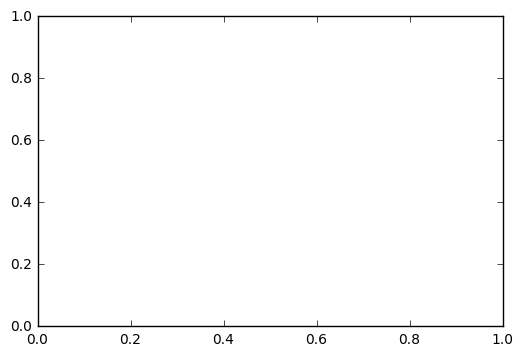

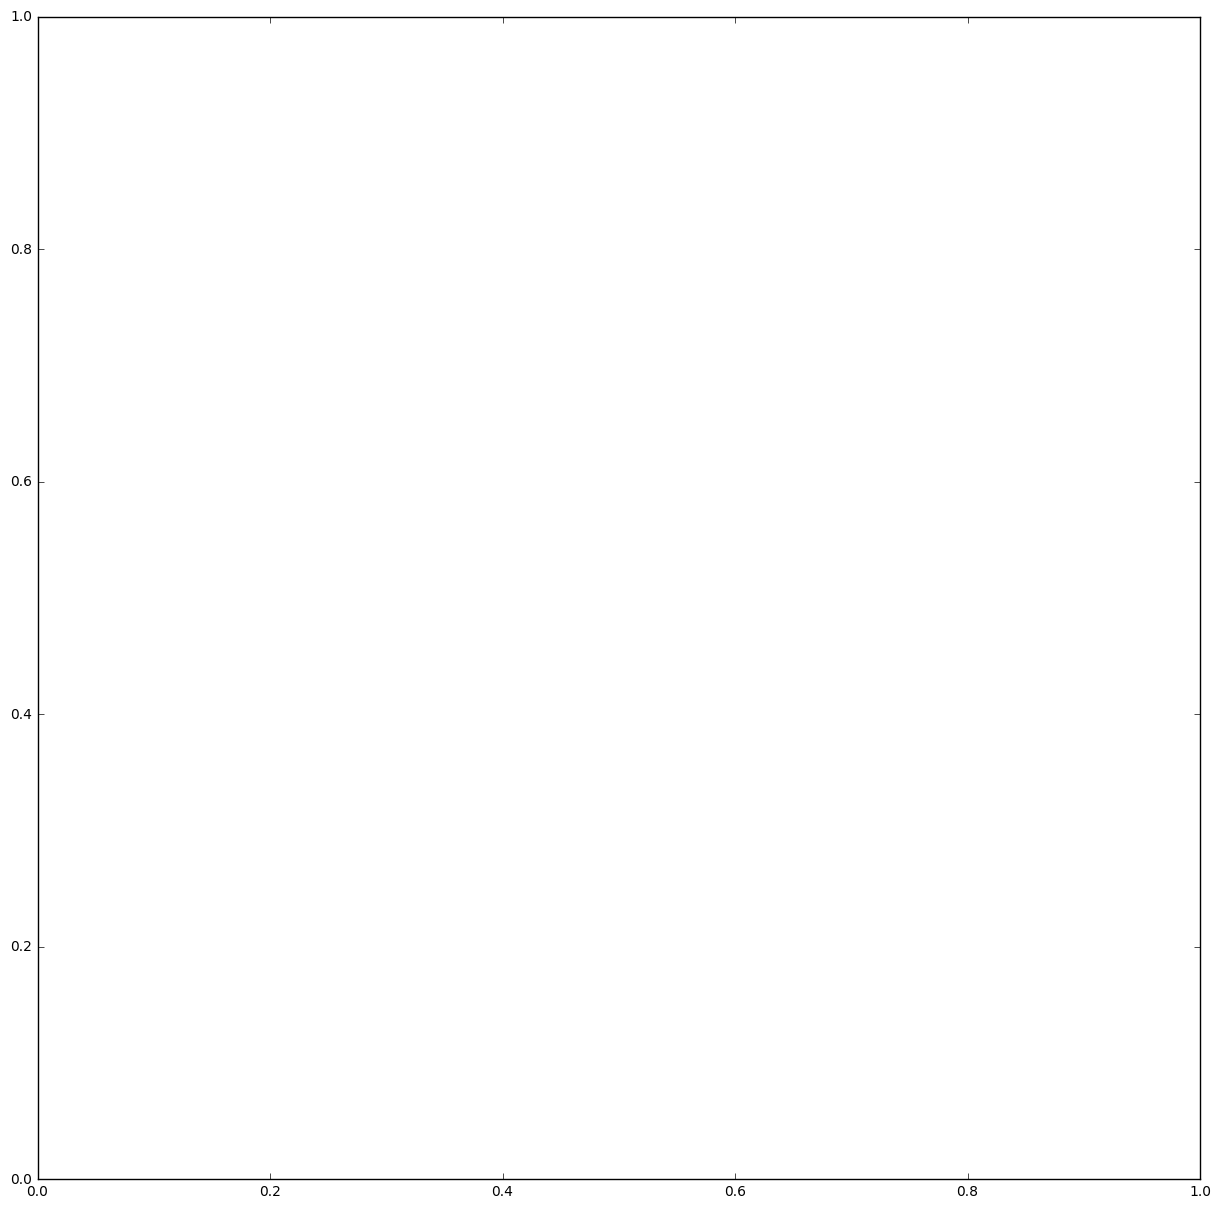

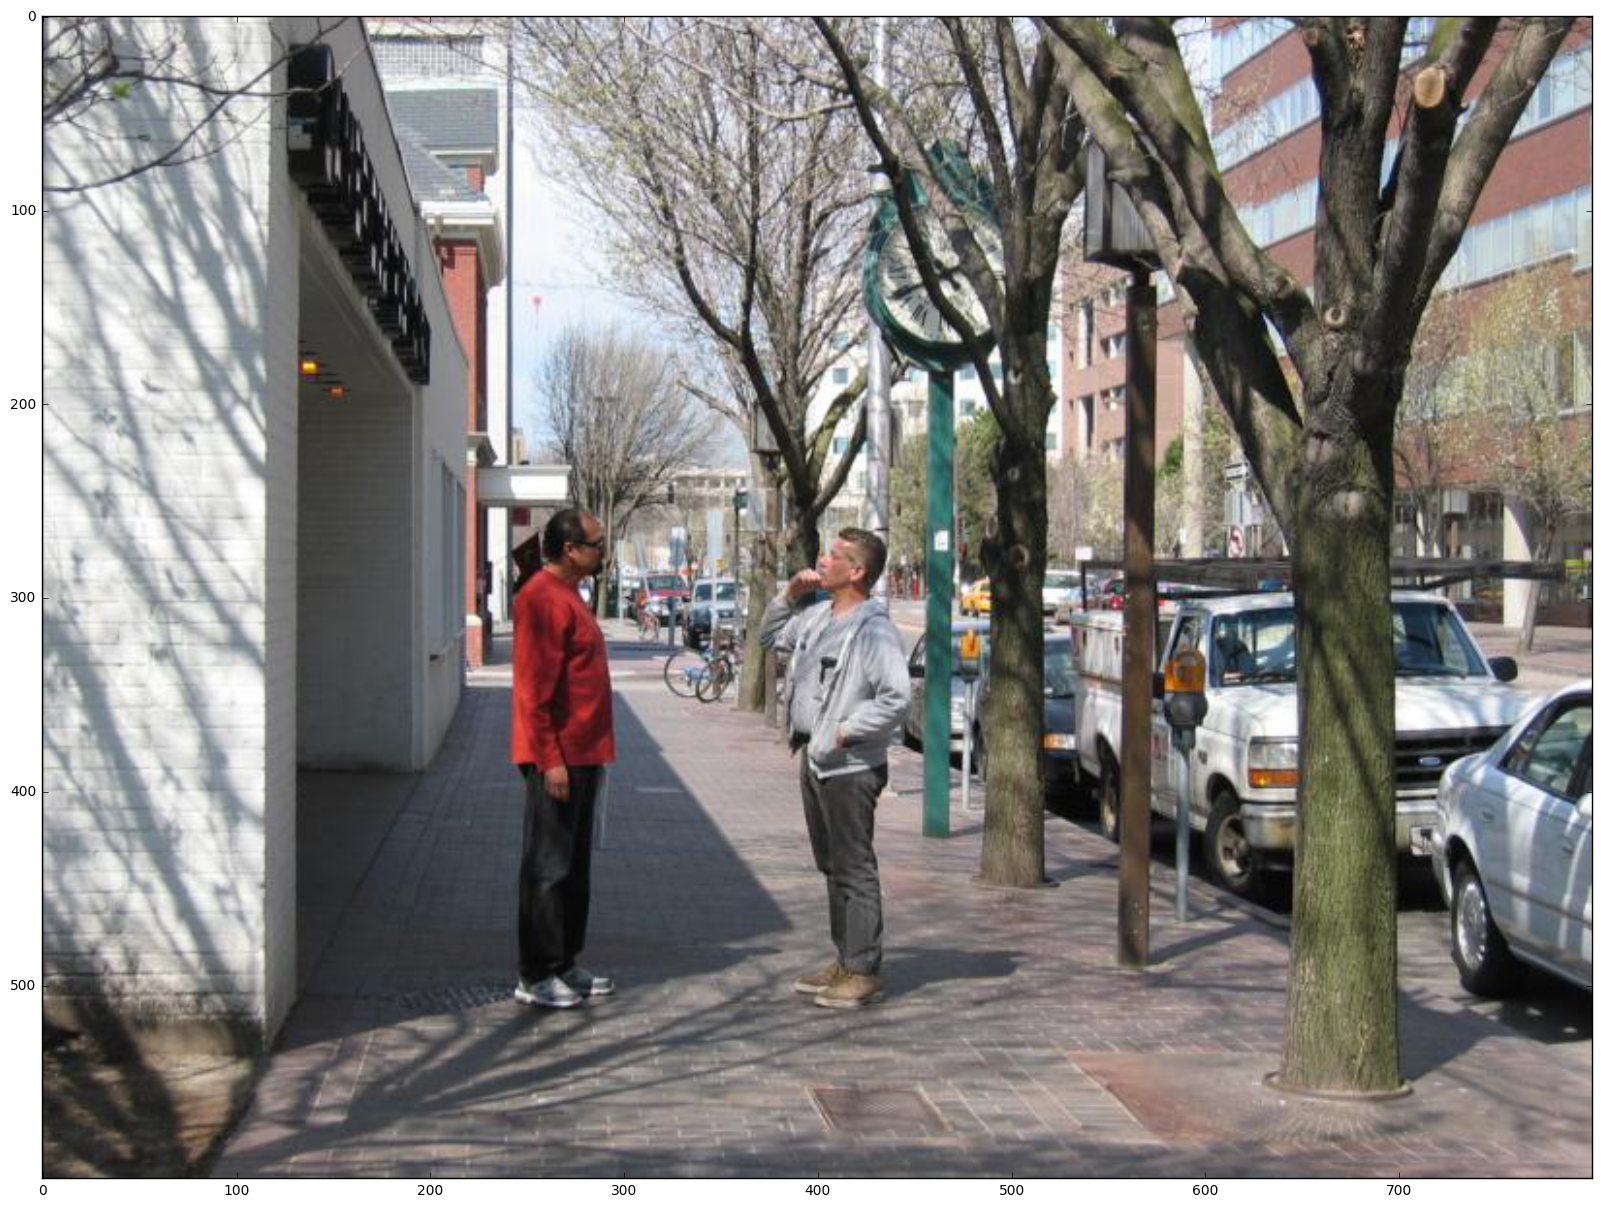

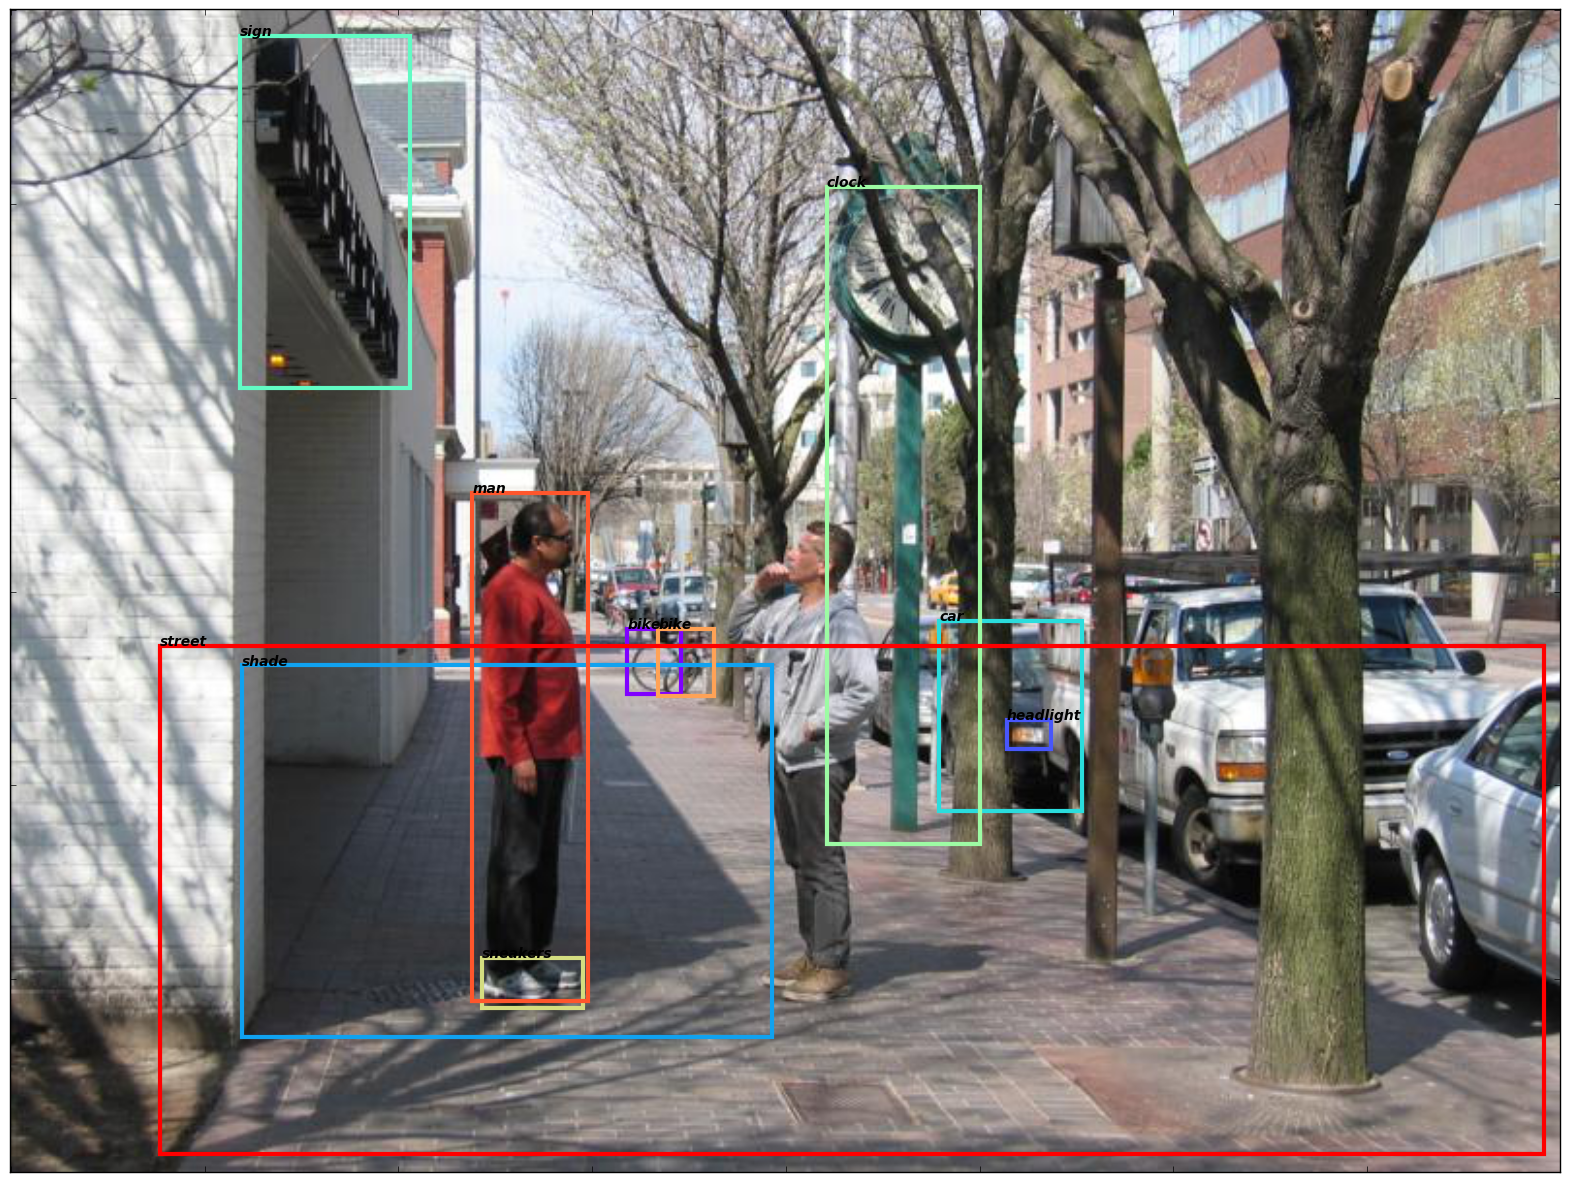

In [30]:
sg = scene_graphs[0]
    
objects = sg.objects
img = plt.imread(data_dir+'images/{}.jpg'.format(sg.image.id))

N = 10
visualize_objects(img, objects[:N])